<a href="https://colab.research.google.com/github/PDeySarkar103/Dissertation_103/blob/main/103_Dissertation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from warnings import filterwarnings
filterwarnings(action='ignore')

In [ ]:
import time #For getting time elapsed for each algorithm

# Loading Datasets

In [ ]:
!pip install astroquery

In [ ]:
from astroquery.sdss import SDSS

query = """SELECT TOP 500000
p.objid,p.ra,p.dec,p.u,p.g,p.r,p.i,p.z,
 p.run, p.rerun, p.camcol, p.field,
s.specobjid, s.class, s.z as redshift,
s.plate, s.mjd, s.fiberid
FROM PhotoObj AS p
JOIN SpecObj AS s ON s.bestobjid = p.objid
"""
res = SDSS.query_sql(query, data_release=18)
df = res.to_pandas()
df.to_csv('SDSS18.csv')

In [ ]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237660961324990835,129.628095,29.059057,24.91692,21.27143,19.59078,18.90489,18.49419,3606,301,2,37,1427672192287533056,GALAXY,0.320806,1268,52933,113
1,1237660961324794071,129.199021,28.701754,23.01294,20.46514,18.83662,18.16925,17.73204,3606,301,2,34,1427680713502648320,GALAXY,0.346654,1268,52933,144
2,1237667431716028643,168.726601,27.680925,21.65936,21.73216,21.61713,21.60229,21.24192,5112,301,6,385,12786905858127976448,QSO,1.007728,11357,58522,220
3,1237663478725412161,341.391899,-0.317673,22.92673,23.03158,22.75313,21.40591,20.70943,4192,301,3,231,10366217195781117952,GALAXY,0.820115,9207,57667,206
4,1237678858469572915,355.175132,11.848611,22.77060,22.25927,20.17230,19.13553,18.60195,7773,301,2,279,6933510808703096832,GALAXY,0.507599,6158,56239,797


In [ ]:
df.shape

(500000, 18)

# EDA(Exploratory Data Analysis)

In [ ]:
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   objid      500000 non-null  uint64 
 1   ra         500000 non-null  float64
 2   dec        500000 non-null  float64
 3   u          500000 non-null  float64
 4   g          500000 non-null  float64
 5   r          500000 non-null  float64
 6   i          500000 non-null  float64
 7   z          500000 non-null  float64
 8   run        500000 non-null  int64  
 9   rerun      500000 non-null  int64  
 10  camcol     500000 non-null  int64  
 11  field      500000 non-null  int64  
 12  specobjid  500000 non-null  uint64 
 13  class      500000 non-null  object 
 14  redshift   500000 non-null  float64
 15  plate      500000 non-null  int64  
 16  mjd        500000 non-null  int64  
 17  fiberid    500000 non-null  int64  
dtypes: float64(8), int64(7), object(1), uint64(2)
memory usage: 68.7

In [ ]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,5.000000e+05,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.0,500000.000000,500000.000000,5.000000e+05,500000.000000,500000.000000,500000.000000,500000.000000
mean,1.237665e+18,173.659735,24.424406,21.484006,20.034519,19.208062,18.578106,18.196420,4497.295946,301.0,3.225030,183.913510,5.741141e+18,0.573813,5099.050150,55574.817454,439.977036
std,8.549771e+12,95.847034,19.761441,77.653857,76.332495,63.389204,67.966743,72.258320,1990.650040,0.0,1.615069,140.019609,3.286152e+18,0.725756,2918.671984,1799.383015,273.505756
min,1.237646e+18,0.000095,-18.865961,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,109.000000,301.0,1.000000,11.000000,2.994897e+17,-0.010932,266.000000,51608.000000,1.000000
25%,1.237658e+18,126.748778,6.448648,20.322487,18.904610,18.048225,17.644393,17.380937,2986.000000,301.0,2.000000,83.000000,2.862093e+18,0.066297,2542.000000,54259.000000,209.000000
50%,1.237664e+18,173.399104,23.264941,22.184585,21.090675,20.102535,19.379070,18.975440,4263.000000,301.0,3.000000,148.000000,5.616212e+18,0.425271,4988.000000,55882.000000,417.000000
75%,1.237670e+18,229.740522,39.991736,23.709705,22.123980,21.008260,20.330970,19.869582,5598.000000,301.0,5.000000,246.000000,8.191110e+18,0.688183,7275.000000,56711.000000,639.000000
max,1.237681e+18,359.999810,84.490494,32.781390,31.602240,31.990100,32.141470,29.514250,8162.000000,301.0,6.000000,1000.000000,1.412694e+19,7.051930,12547.000000,58932.000000,1000.000000


In [ ]:
df['class'].nunique() # Shows no. of unique entries in the class column

3

In [ ]:
df['class'].unique() # The unique elements in class column

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [ ]:
df['class'].value_counts()

GALAXY    305720
STAR      101483
QSO        92797
Name: class, dtype: int64

# Visualization of Data

## Histogram plot

In [ ]:
sns.set(style='darkgrid',palette='dark')

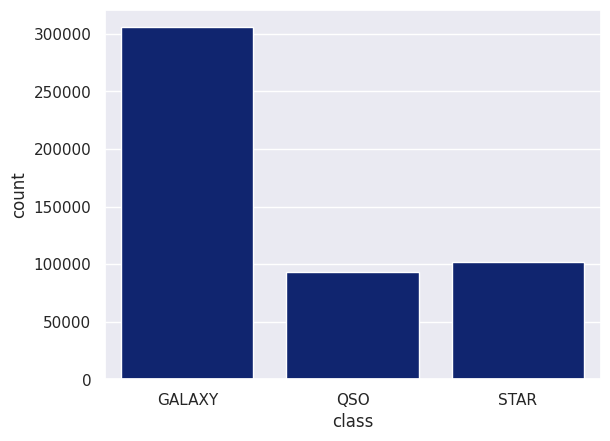

In [ ]:
sns.countplot(x=df['class'])
plt.show()

## Correlation Matrix

<Axes: >

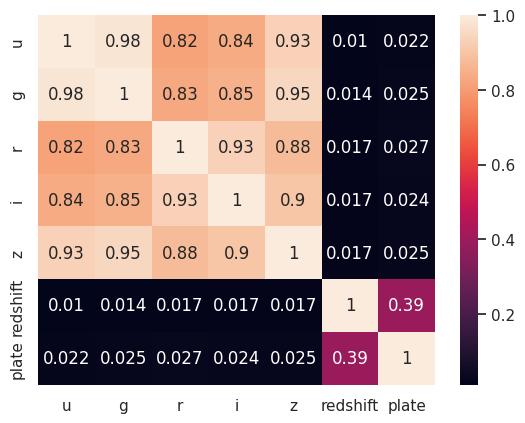

In [ ]:
# Heatmap for expressing correlation

#plt.figure(figsize=(15,10))
sns.heatmap(df.drop(['objid','ra','dec','run','rerun','camcol','field','specobjid','mjd','fiberid'],axis = 1).corr(),annot = True)

## Pairplot

In [ ]:
data_pp=df.drop(['objid','ra','dec','run','rerun','camcol','field','specobjid','mjd','fiberid'],axis=1)
#hue_pp=df['class']

,u,g,r,i,z,class,redshift,plate
0,24.91692,21.27143,19.59078,18.90489,18.49419,GALAXY,0.320806,1268
1,23.01294,20.46514,18.83662,18.16925,17.73204,GALAXY,0.346654,1268
2,21.65936,21.73216,21.61713,21.60229,21.24192,QSO,1.007728,11357
3,22.92673,23.03158,22.75313,21.40591,20.70943,GALAXY,0.820115,9207
4,22.77060,22.25927,20.17230,19.13553,18.60195,GALAXY,0.507599,6158
...,...,...,...,...,...,...,...,...
499995,21.73880,21.24219,21.37818,21.67941,20.99058,STAR,-0.000033,5735
499996,18.67114,17.76073,17.42752,17.27838,17.24606,STAR,0.000080,7305
499997,20.15498,18.03296,16.75716,16.28420,15.91512,GALAXY,0.184548,524
499998,19.22085,17.89154,17.20255,16.82035,16.53139,GALAXY,0.129826,516


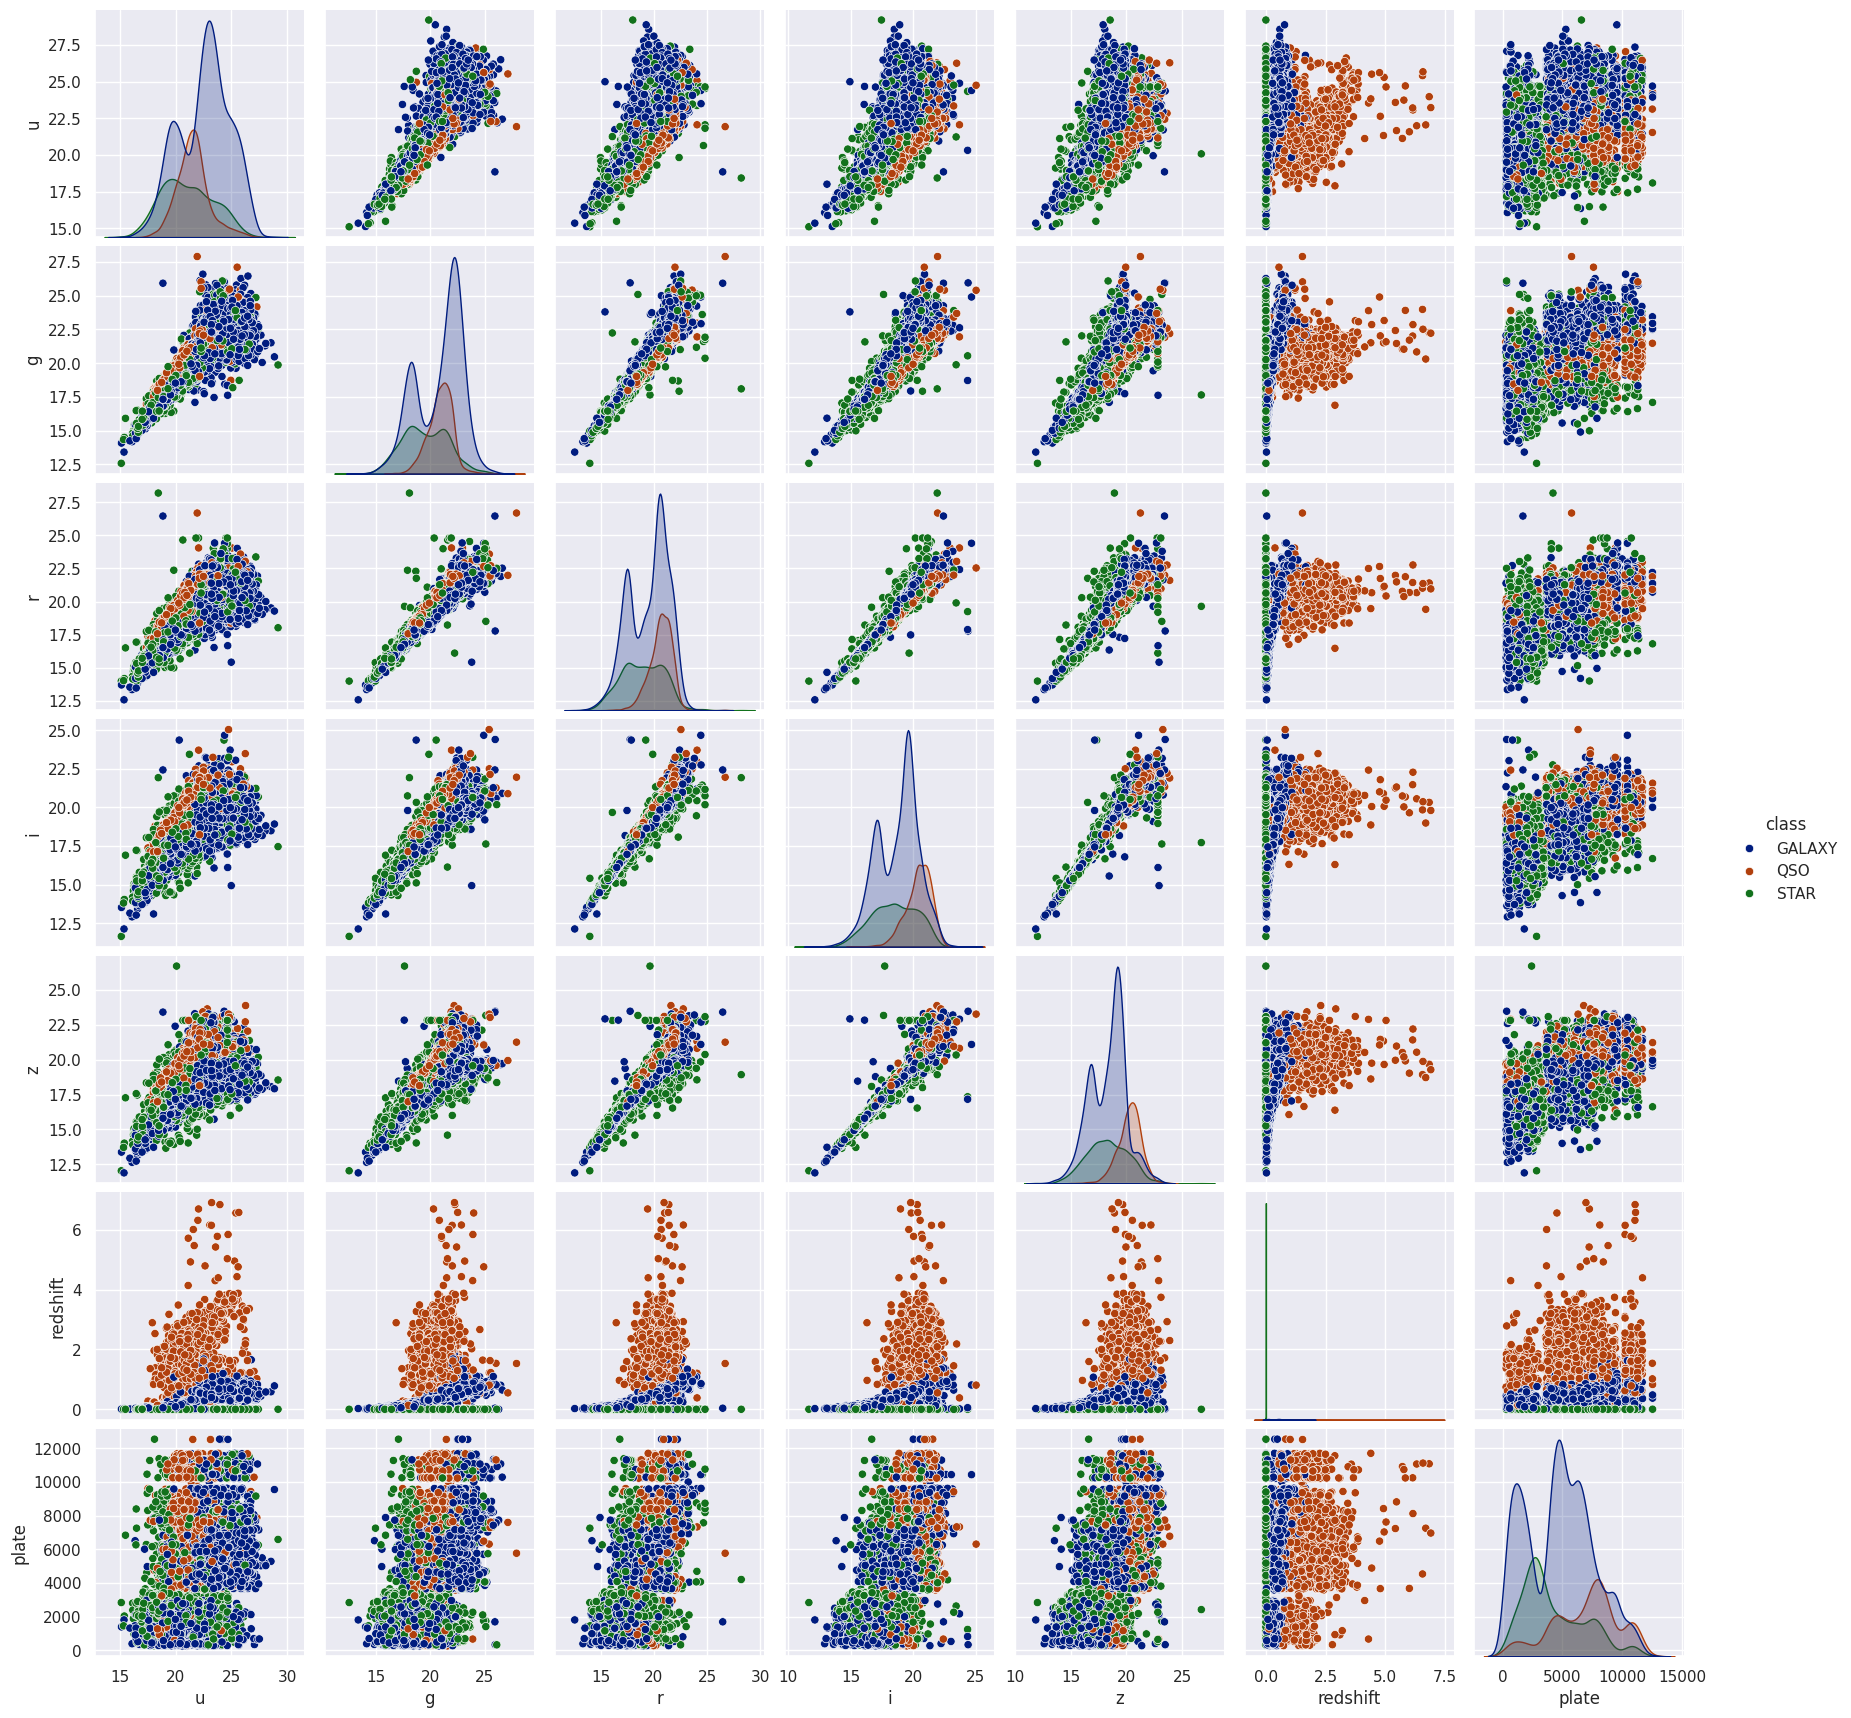

In [ ]:
sns.pairplot(data_pp.sample(10000),hue='class')

## Bin plot

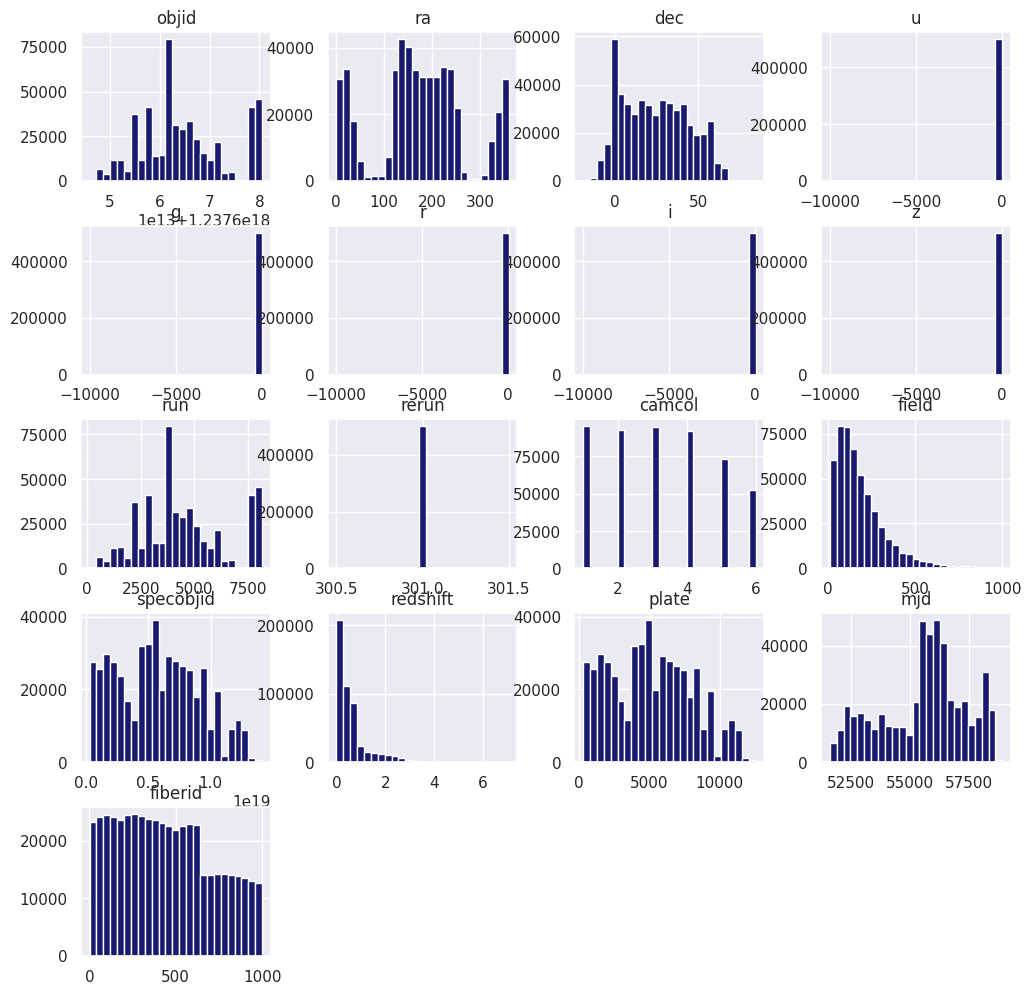

In [ ]:
df.hist(bins=25,figsize=(12,12),color='midnightblue')
plt.show()

# Data Preprocessing

## Feature Selection

In [ ]:
X=df[['u','g','r','i','z','redshift','plate']]
X

,u,g,r,i,z,redshift,plate
0,24.91692,21.27143,19.59078,18.90489,18.49419,0.320806,1268
1,23.01294,20.46514,18.83662,18.16925,17.73204,0.346654,1268
2,21.65936,21.73216,21.61713,21.60229,21.24192,1.007728,11357
3,22.92673,23.03158,22.75313,21.40591,20.70943,0.820115,9207
4,22.77060,22.25927,20.17230,19.13553,18.60195,0.507599,6158
...,...,...,...,...,...,...,...
499995,21.73880,21.24219,21.37818,21.67941,20.99058,-0.000033,5735
499996,18.67114,17.76073,17.42752,17.27838,17.24606,0.000080,7305
499997,20.15498,18.03296,16.75716,16.28420,15.91512,0.184548,524
499998,19.22085,17.89154,17.20255,16.82035,16.53139,0.129826,516


In [ ]:
Y=df['class']
Y

0         GALAXY
1         GALAXY
2            QSO
3         GALAXY
4         GALAXY
           ...  
499995      STAR
499996      STAR
499997    GALAXY
499998    GALAXY
499999    GALAXY
Name: class, Length: 500000, dtype: object

## Resampling

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 30, k_neighbors = 5)
X_res, Y_res = sm.fit_resample(X, Y)

In [ ]:
X_res

,u,g,r,i,z,redshift,plate
0,24.916920,21.271430,19.590780,18.904890,18.494190,0.320806,1268
1,23.012940,20.465140,18.836620,18.169250,17.732040,0.346654,1268
2,21.659360,21.732160,21.617130,21.602290,21.241920,1.007728,11357
3,22.926730,23.031580,22.753130,21.405910,20.709430,0.820115,9207
4,22.770600,22.259270,20.172300,19.135530,18.601950,0.507599,6158
...,...,...,...,...,...,...,...
917155,19.268566,18.349795,18.096735,17.990393,17.938650,-0.000498,3166
917156,19.637878,18.701171,18.408278,18.312038,18.280611,-0.000012,4875
917157,20.419552,19.348299,19.291572,19.324290,19.432257,-0.000435,695
917158,20.978910,19.571907,18.992350,18.780590,18.637066,0.000107,8822


In [ ]:
Y_res

0         GALAXY
1         GALAXY
2            QSO
3         GALAXY
4         GALAXY
           ...  
917155      STAR
917156      STAR
917157      STAR
917158      STAR
917159      STAR
Name: class, Length: 917160, dtype: object

In [ ]:
# Generating the resampled dataset
df1=X_res
Y_res1=Y_res
Y_res1=Y_res1.tolist()
df1.loc[:,'class']=Y_res1
df1

,u,g,r,i,z,redshift,plate,class
0,24.916920,21.271430,19.590780,18.904890,18.494190,0.320806,1268,GALAXY
1,23.012940,20.465140,18.836620,18.169250,17.732040,0.346654,1268,GALAXY
2,21.659360,21.732160,21.617130,21.602290,21.241920,1.007728,11357,QSO
3,22.926730,23.031580,22.753130,21.405910,20.709430,0.820115,9207,GALAXY
4,22.770600,22.259270,20.172300,19.135530,18.601950,0.507599,6158,GALAXY
...,...,...,...,...,...,...,...,...
917155,19.268566,18.349795,18.096735,17.990393,17.938650,-0.000498,3166,STAR
917156,19.637878,18.701171,18.408278,18.312038,18.280611,-0.000012,4875,STAR
917157,20.419552,19.348299,19.291572,19.324290,19.432257,-0.000435,695,STAR
917158,20.978910,19.571907,18.992350,18.780590,18.637066,0.000107,8822,STAR


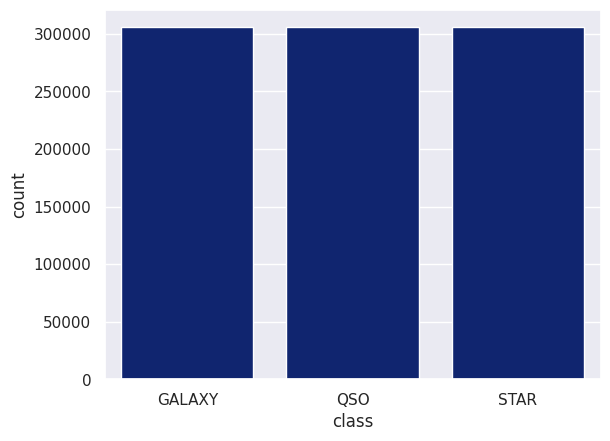

In [ ]:
sns.countplot(x=df1['class'])
plt.show()

# ML Methods

## Encoding

In [ ]:
#encoder={'GALAXY':1,'STAR':0,'QSO':2}
#df['class']=df['class'].map(encoder)

In [ ]:
#df['class'].value_counts()

In [ ]:
Y=df1['class']

In [ ]:
# We can also use scikit learn for this
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
Y_resML=LE.fit_transform(Y)

In [ ]:
Y_resML

array([0, 0, 1, ..., 2, 2, 2])

In [ ]:
X_res=df1[['u','g','r','i','z','redshift','plate']]
X_res

,u,g,r,i,z,redshift,plate
0,24.916920,21.271430,19.590780,18.904890,18.494190,0.320806,1268
1,23.012940,20.465140,18.836620,18.169250,17.732040,0.346654,1268
2,21.659360,21.732160,21.617130,21.602290,21.241920,1.007728,11357
3,22.926730,23.031580,22.753130,21.405910,20.709430,0.820115,9207
4,22.770600,22.259270,20.172300,19.135530,18.601950,0.507599,6158
...,...,...,...,...,...,...,...
917155,19.268566,18.349795,18.096735,17.990393,17.938650,-0.000498,3166
917156,19.637878,18.701171,18.408278,18.312038,18.280611,-0.000012,4875
917157,20.419552,19.348299,19.291572,19.324290,19.432257,-0.000435,695
917158,20.978910,19.571907,18.992350,18.780590,18.637066,0.000107,8822


In [ ]:
# GALAXY= 0
# QSO   = 1
# STAR  = 2

In [ ]:
X_res.size

6420120

## Splitting Datasets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_res,Y_resML,test_size=0.25,random_state=30)

In [ ]:
X_train

,u,g,r,i,z,redshift,plate
119536,24.308870,22.408580,20.920300,19.904760,19.416690,0.489096,4467
771294,21.211259,20.597858,20.439433,20.471448,20.610943,-0.000039,3745
293219,21.922560,21.307460,21.366760,21.317630,21.099540,2.347383,6488
728245,24.411206,22.214938,20.919958,19.760594,19.067316,0.000043,4471
740115,24.701691,21.723154,21.011383,20.763194,20.742534,0.000345,3794
...,...,...,...,...,...,...,...
328599,20.572990,20.379460,20.306100,20.419610,20.052210,0.843790,489
570508,21.781885,21.342820,21.365333,21.316892,21.317145,2.156030,5730
885236,18.877796,17.936881,17.565872,17.438205,17.399531,-0.000367,6254
572333,22.043119,21.146192,21.167008,21.020714,20.840751,2.663944,8424


In [ ]:
y_train

array([0, 2, 1, ..., 2, 1, 0])

## Classification Algorithms

In [ ]:
# Creating a dataframe to store the accuracy scores of all the classification algorithms so that we are able to choose the best one

score_df=pd.DataFrame(columns=['Algorithm','Recall_Score','Time'])

In [ ]:
score_df

,Algorithm,Recall_Score,Time


### Logistic Regression

In [ ]:
# Training the ML model

from sklearn.linear_model import LogisticRegression

model=LogisticRegression(max_iter=1000)

start_time=time.time()
model.fit(X_train,y_train)
end_time=time.time()

y_pred1=model.predict(X_test)

LR_time=end_time-start_time

Text(46.25, 0.5, 'Prediction')

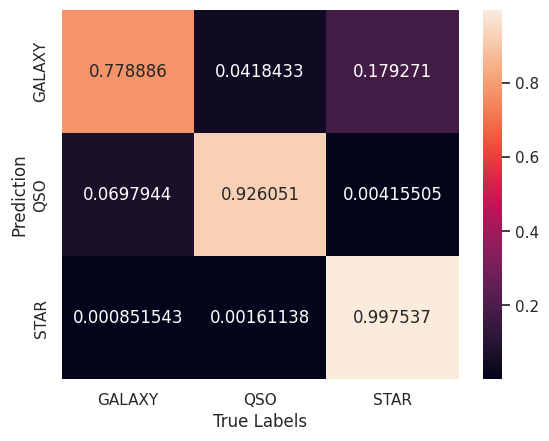

In [ ]:
# Generating the confusion matrix

from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test,y_pred1,normalize='true')
sns.heatmap(cm_lr,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

In [ ]:
# Getting the Recall score

from sklearn.metrics import recall_score
LR_score=recall_score(y_test,y_pred1,average='weighted')
#print(LR_score)
# Adding Recall Score to the table

score_df=score_df.append({'Algorithm':'Logistic Regression','Recall_Score':LR_score,'Time':LR_time/60},ignore_index=True)
score_df

,Algorithm,Recall_Score,Time
0,Logistic Regression,0.900488,3.019121


### Decision Tree

In [ ]:
# Training the ML model

from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(criterion='entropy',random_state=30)

start_time=time.time()
model.fit(X_train,y_train)
end_time=time.time()

y_pred2=model.predict(X_test)
DT_time=end_time-start_time

Text(46.25, 0.5, 'Prediction')

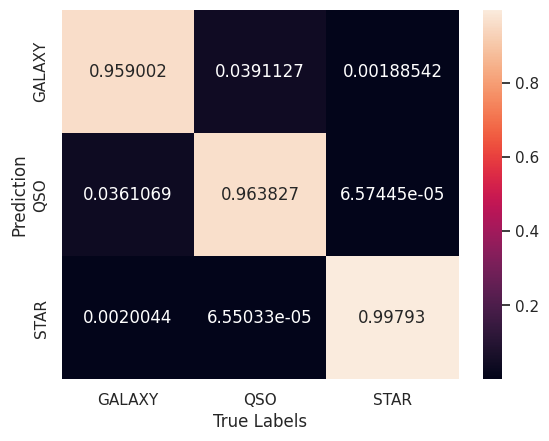

In [ ]:
# Generating the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm_dt=confusion_matrix(y_test,y_pred2,normalize='true')

sns.heatmap(cm_dt,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

In [ ]:
# Getting the Recall score

from sklearn.metrics import recall_score
dt_score=recall_score(y_test,y_pred2,average='weighted')
#print(LR_score)
# Adding Recall Score to the table

score_df=score_df.append({'Algorithm':'Decision Tree','Recall_Score':dt_score,'Time':DT_time/60},ignore_index=True)
score_df

,Algorithm,Recall_Score,Time
0,Logistic Regression,0.900488,3.019121
1,Decision Tree,0.973562,0.286057


### Random Forest

In [ ]:
# First, we'll create a dataframe where we'll store recall score of random forest algorithm with different values of n_estimators
# Then, we'll choose the maximum one and consider that as the recall score

rf_df=pd.DataFrame(columns=['Estimators','Recall score'])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

start_time=time.time()
for i in range(1,31):
  model=RandomForestClassifier(criterion='gini',n_estimators=i,random_state=30)
  model.fit(X_train,y_train)
  y_pred3=model.predict(X_test)
  rf_df=rf_df.append({'Estimators':i,'Recall score':recall_score(y_test,y_pred3,average='weighted')},ignore_index=True)


In [ ]:
rf_df

,Estimators,Recall score
0,1.0,0.969824
1,2.0,0.971983
2,3.0,0.978643
3,4.0,0.979567
4,5.0,0.980684
5,6.0,0.981007
6,7.0,0.981582
7,8.0,0.981757
8,9.0,0.982141
9,10.0,0.982036


In [ ]:
# Sorting

rf_df=rf_df.sort_values(by='Recall score',ascending=False)
rf_df.head()

,Estimators,Recall score
43,28.0,0.982891
45,30.0,0.982886
42,27.0,0.982878
40,25.0,0.982856
44,29.0,0.982847


:The above table shows that the recall score is highest for n=28.0. So we'll keep n_estimators=28.0

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=28,random_state=30)
model.fit(X_train,y_train)
end_time=time.time()
y_pred3=model.predict(X_test)

RF_time=end_time-start_time

from sklearn.metrics import recall_score
rf_score=recall_score(y_test,y_pred3,average='weighted')
rf_score

0.982890662479829

In [ ]:
# Adding accuracy to the data frame
score_df=score_df.append({'Algorithm':'Random Forest','Recall_Score':rf_score,'Time':RF_time/60},ignore_index=True)
score_df

,Algorithm,Recall_Score,Time
0,Logistic Regression,0.900488,3.019121
1,Decision Tree,0.973562,0.286057
2,Random Forest,0.982891,35.989420


Text(46.25, 0.5, 'Prediction')

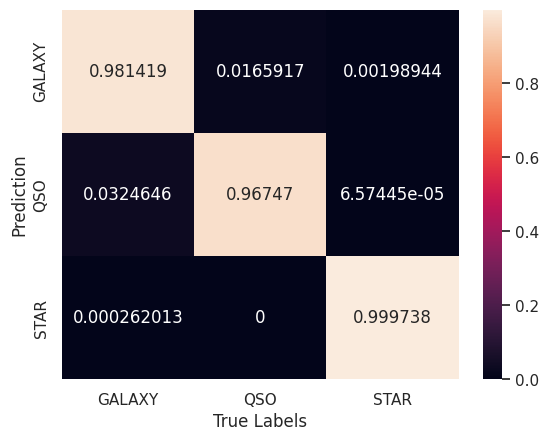

In [ ]:
# Generating the confusion matrix
from sklearn.metrics import confusion_matrix

cm_rf=confusion_matrix(y_test,y_pred3,normalize='true')

sns.heatmap(cm_rf,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

### KNN

In [ ]:
# We'll create a dataframe to store recall score of K Neighbour Classifiers with different n_neighbour values.
# From there, we shall choose the maximum one and consider that as recall score for KNN algo.

knn_df=pd.DataFrame(columns=['Neighbors','Recall Score'])

In [ ]:
# Algorithm

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score

start_time=time.time()
for i in range(1,31):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train,y_train)
  y_pred4=model.predict(X_test)
  knn_df=knn_df.append({'Neighbors':i,'Recall Score':recall_score(y_test,y_pred4,average='weighted')},ignore_index=True)

knn_df

,Neighbors,Recall Score
0,1.0,0.949893
1,2.0,0.935885
2,3.0,0.937163
3,4.0,0.930075
4,5.0,0.928588
5,6.0,0.924092
6,7.0,0.922975
7,8.0,0.918518
8,9.0,0.917576
9,10.0,0.913865


In [ ]:
knn_df=knn_df.sort_values(by='Recall Score',ascending=False)
knn_df.head()

,Neighbors,Recall Score
0,1.0,0.949893
2,3.0,0.937163
1,2.0,0.935885
3,4.0,0.930075
4,5.0,0.928588


Here, we see the recall score is maximum for n=1.0 Hence, we will choose n=1.0

In [ ]:
# KNN algo for n_neighbors=1.0

from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=1)
model.fit(X_train,y_train)

end_time=time.time()
y_pred4=model.predict(X_test)

KNN_time=end_time-start_time
from sklearn.metrics import recall_score
knn_score=recall_score(y_test,y_pred4,average='weighted')
print(knn_score)

0.9498931484146714


In [ ]:
score_df=score_df.append({'Algorithm':'KNN','Recall_Score':knn_score,'Time':KNN_time/60},ignore_index=True)
score_df

,Algorithm,Recall_Score,Time
0,Logistic Regression,0.900488,3.019121
1,Decision Tree,0.973562,0.286057
2,Random Forest,0.982891,35.989420
3,KNN,0.949893,13.136001


Text(46.25, 0.5, 'Prediction')

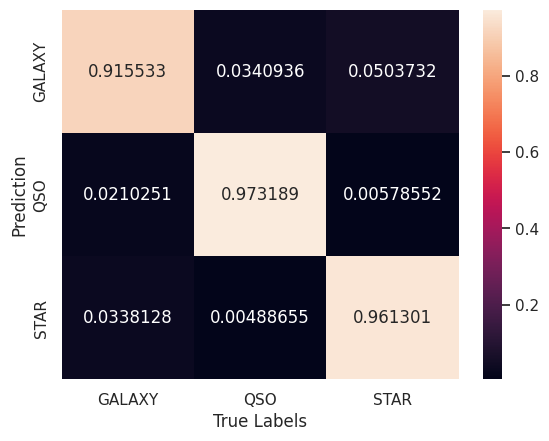

In [ ]:
# Viewing the Confusion matrix
from sklearn.metrics import confusion_matrix

cm_knn=confusion_matrix(y_test,y_pred4,normalize='true')

sns.heatmap(cm_knn,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

### SVM

# Neural Networks

### Re-encode

In [ ]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
l_encode=LabelEncoder()
l_encode.fit(Y_res)
Y_resN=l_encode.transform(Y_res)
Y_resN=to_categorical(Y_resN)

Resampling the data

### Splitting to training and testing data set

In [ ]:
from sklearn.model_selection import train_test_split
Xr_train, Xr_test, yr_train, yr_test= train_test_split(X_res,Y_resN,test_size=0.25,random_state=210)

In [ ]:
Xr_train.shape,Xr_test.shape,yr_train.shape,yr_test.shape

((687870, 7), (229290, 7), (687870, 3), (229290, 3))

Now, we shall make the model. For that we have to import th following

## ANN

### Making the model

In [ ]:
import tensorflow as tf
#from tensorflow.keras.layers import Dense
#from tensorflow.keras.models import Sequential

Now, we shall start with the model.

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(128,input_dim=Xr_train.shape[1],activation='relu'),
    tf.keras.layers.Dense(48,activation='relu'),
    #tf.keras.layers.Dense(32,activation='relu'),
    #tf.keras.layers.Dense(15,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax'),
    ])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 48)                6192      
                                                                 
 dense_2 (Dense)             (None, 3)                 147       
                                                                 
Total params: 7363 (28.76 KB)
Trainable params: 7363 (28.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compiling the model

In [ ]:
start_time=time.time()

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(Xr_train,yr_train,validation_data=(Xr_test,yr_test),epochs=40,verbose=0)

end_time=time.time()

ANN_time=end_time-start_time

In [ ]:
model_loss_acc = pd.DataFrame(model.history.history)
model_loss_acc[['loss', 'val_loss']].plot()
model_loss_acc[['accuracy', 'val_accuracy']].plot()

### Evaluating the model's accuracy

In [ ]:
y_pred6=np.round(model.predict(Xr_test))

In [ ]:
y_pred6

In [ ]:
from sklearn.metrics import recall_score

ann_score=recall_score(yr_test,y_pred6,average='weighted')
ann_score

In [ ]:
score_df=score_df.append({'Algorithm':'ANN','Recall_Score':ann_score,'Time':ANN_time/60},ignore_index=True)
score_df

In [ ]:
score_df.sort_values(by='Recall_Score')
score_df.head()

In [ ]:
y_pred6.shape

In [ ]:
yr_test

In [ ]:
#confusion_matrix(preds2.argmax(axis = 1), yr_test.argmax(axis = 1))

#plt.figure(figsize = (6,6))
#from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
#ConfusionMatrixDisplay.from_predictions(yr_test.argmax(axis = 1), y_pred6.argmax(axis = 1), display_labels = ['GALAXY', 'QUASAR', 'STAR'])

In [ ]:
# Viewing the Confusion matrix
from sklearn.metrics import confusion_matrix

cm_ann=confusion_matrix(yr_test.argmax(axis=1),y_pred6.argmax(axis=1),normalize='true')

sns.heatmap(cm_ann,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

# Comparing all the algorithms

## Recall scores

In [ ]:
score_df

## Confusion Matrices

In [ ]:
plt.figure(figsize=(15,15))
plt.suptitle('Confusion matrix for different algorithms')

plt.subplot(321)
plt.title('Logistic Regression')
sns.heatmap(cm_lr,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

plt.subplot(322)
plt.title('Decision Tree')
sns.heatmap(cm_dt,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

plt.subplot(323)
plt.title('Random forest')
sns.heatmap(cm_rf,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

plt.subplot(324)
plt.title('KNN')
sns.heatmap(cm_knn,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

plt.subplot(325)
plt.title('ANN')
sns.heatmap(cm_ann,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')
